In [2]:
# imports and stuff
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter

The Data I chose: Spotify Music Dataset from kaggle ( https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset )
It consits of two csv files; high popularity and low popularity

In [3]:
# Importing the data
high = pd.read_csv('../data/high_popularity_spotify_data.csv')
low = pd.read_csv('../data/low_popularity_spotify_data.csv')
# Could I create a merged dataset with an extra 'popularity' column to distinguish the two?

In [4]:
print('high', high.columns)
# print('high', low.columns)

print('high', high.shape)
print('low', high.shape)

high Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='object')
high (1686, 29)
low (1686, 29)


Both have the same columns (and even the same amount of samples)
As they already have a 'track_popularity' column, I might not actually need to create one to distinguish the two,
if I know the threshold for high & low priority.\
Of course, the question arises, how chose this threshold and why. Maybe looking into the domain of this column can tell me more.\
I think a first interesting research question could be:"What parameters influence (the most), whether a song is popular or not

In [5]:
print('high max popularity level:', high['track_popularity'].max())
print('high min popularity level:', high['track_popularity'].min())
print('low max popularity level:', low['track_popularity'].max())
print('low min popularity level:' , low['track_popularity'].min())

high max popularity level 100
high min popularity level 68
low max popularity level 68
low min popularity level 11


Looks like the domain is 0-100, i.e. a percentage value and the threshold for low/high popularity seems to be 68.
Maybe, as both datasets have the same amount of observations, it's just the median of the whole dataset\
As songs with a popularity level of 68 are in both datasets, I'm assuming they just split in half\
Let's look at the 5 most popular and unpopular songs of the datasets

In [6]:
high = high.sort_values(by='track_popularity', ascending=False)
print("Most popular:\n", high[["track_name", "track_id", "track_artist", "track_album_name", "track_popularity", "playlist_name"]].head(5))

Most popular:
            track_name                track_id           track_artist  \
676  Die With A Smile  2plbrEY59IikOBgBGLjaoe  Lady Gaga, Bruno Mars   
455  Die With A Smile  2plbrEY59IikOBgBGLjaoe  Lady Gaga, Bruno Mars   
0    Die With A Smile  2plbrEY59IikOBgBGLjaoe  Lady Gaga, Bruno Mars   
677              APT.  5vNRhkKd0yEAg8suGBpjeY       ROSÉ, Bruno Mars   
4                APT.  5vNRhkKd0yEAg8suGBpjeY       ROSÉ, Bruno Mars   

     track_album_name  track_popularity      playlist_name  
676  Die With A Smile               100      Global Top 50  
455  Die With A Smile               100  Top Gaming Tracks  
0    Die With A Smile               100   Today's Top Hits  
677              APT.                98      Global Top 50  
4                APT.                98   Today's Top Hits  


No Taylor Swift, what a nice surprise. I'm guessing this data is from when "Die with a smile" just came out.
I already see some problems with the dataset: Songs are saved multiple times (not sure if they are different versions, or just the same versions e.g. as single and as part of an album) However, as title is saved here, it should be no problem removing duplicates.

In [7]:
display(high[:5])

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
676,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,global,audio_features,37i9dQZEVXbMDoHDwVN2tF
455,0.592,157.969,0.521,gaming,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,modern,audio_features,37i9dQZF1DWTyiBJ6yEqeu
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
677,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,global,audio_features,37i9dQZEVXbMDoHDwVN2tF
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [8]:
low = low.sort_values(by='track_popularity', ascending=False)
print("Most unpopular:\n", low[["track_name", "track_id", "track_artist", "track_album_name", "track_popularity"]].tail(5))

Most unpopular:
                   track_name                track_id   track_artist  \
3009          Hit The Ground  1we3IyLdDkmtZctE9xbFgm  Lilly Ahlberg   
2274      A Vaibele A Tsnien  03bEE0edmcuf9iraKHlENO    Dave Tarras   
3081                 Make It  19bfMEAOJGHEAL2pS3gNoS  Daniel Schulz   
3128  Blue Flag / Fun Things  6VvRwqQpgWU1WclXgCOKI8  Jesper Jenset   
3102            It Ain't You  4egXSi9VmYuJaq6Xa1ECQm      Hedda Mae   

                                track_album_name  track_popularity  
3009                              Hit The Ground                11  
2274  Yiddish-American Klezmer Music - 1925-1956                11  
3081                                     Make It                11  
3128                      Blue Flag / Fun Things                11  
3102                         This Might Get Loud                11  


## Cleaning and combining the 2 datasets
As I know the "Threshold" by which a song is classified as high/low popular I can just merge the two datasets. (however I still wonder how this values came to be)\
I also want to remove duplicates. Above I can see that in this case the 3 duplicates of "Die With A Smile" actually have the same track_id.
I do however wonder, if there may also be duplicates with just the same names (i.e. different versions of the song)\
I'm not quite sure yet, how I want to handle that. But first I want to test if there are any such cases anyway

1. Combining the datasets

In [9]:
print(high.columns, "\n", low.columns) # Looking manually they seem to have the same columns, but for some reason in different order
print(sorted(high.columns) == sorted(low.columns)) # Sorting them to compare their column names elementwise

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='object') 
 Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'playlist_name', 'track_artist', 'duration_ms', 'energy',
       'playlist_genre', 'playlist_subgenre', 'track_href', 'track_name',
       'mode', 'uri', 'type', 'track_album_release_date', 'analysis_url', 'id',
       'instrumentalness', 'track_album_id', 'playlist_id', 'track_id',
       'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness',
       'track_album_name'],
      dtype='object')
True


As their equality check returned true, we can just go ahead and combine the two

In [23]:
songs = pd.concat([low, high], ignore_index=True).sort_values(by='track_popularity', ascending=False)
print(songs.head(5)["track_popularity"],"\n", songs.tail(5)["track_popularity"]) # Check if correctly concatenated & sorted

3145    100
3147    100
3146    100
3149     98
3148     98
Name: track_popularity, dtype: int64 
 3143    11
3129    11
3130    11
3128    11
3141    11
Name: track_popularity, dtype: int64


2. Check for duplicates

In [24]:
idDupes = songs.duplicated(subset=['track_id'], keep=False)
nameDupes = songs.duplicated(subset=['track_name', 'track_artist'], keep=False)


print("Duplicates by track_id:", idDupes.sum())
print("Duplicates by title and artist:", nameDupes.sum())

Duplicates by track_id: 631
Duplicates by title and artist: 671


Another problem I noticed was that the dataset doesn't save the genre of the song, but of the playlist it's taken from\
$\Rightarrow$ Removing duplicates from different playlist would remove genres of the song (i.e. missing value 'track_genre'... Why did they not include that?)\
What genre to choose? e.g. 'die with a smile' in gaming playlist with 'gaming' genre... does not really fit...
Maybe do a majority vote on all dupes for the main genre and put all other subgenre array?

In [12]:
display(
    songs[idDupes]
)

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
3145,3.0,100,0.0304,0.521,Global Top 50,"Lady Gaga, Bruno Mars",251668.0,0.592,pop,global,...,10FLjwfpbxLmW8c25Xyc2N,37i9dQZEVXbMDoHDwVN2tF,2plbrEY59IikOBgBGLjaoe,0.535,6.0,157.969,-7.777,0.3080,0.1220,Die With A Smile
3147,3.0,100,0.0304,0.521,Today's Top Hits,"Lady Gaga, Bruno Mars",251668.0,0.592,pop,mainstream,...,10FLjwfpbxLmW8c25Xyc2N,37i9dQZF1DXcBWIGoYBM5M,2plbrEY59IikOBgBGLjaoe,0.535,6.0,157.969,-7.777,0.3080,0.1220,Die With A Smile
3146,3.0,100,0.0304,0.521,Top Gaming Tracks,"Lady Gaga, Bruno Mars",251668.0,0.592,gaming,modern,...,10FLjwfpbxLmW8c25Xyc2N,37i9dQZF1DWTyiBJ6yEqeu,2plbrEY59IikOBgBGLjaoe,0.535,6.0,157.969,-7.777,0.3080,0.1220,Die With A Smile
3149,4.0,98,0.2600,0.777,Today's Top Hits,"ROSÉ, Bruno Mars",169917.0,0.783,pop,mainstream,...,2IYQwwgxgOIn7t3iF6ufFD,37i9dQZF1DXcBWIGoYBM5M,5vNRhkKd0yEAg8suGBpjeY,0.939,0.0,149.027,-4.477,0.0283,0.3550,APT.
3148,4.0,98,0.2600,0.777,Global Top 50,"ROSÉ, Bruno Mars",169917.0,0.783,pop,global,...,2IYQwwgxgOIn7t3iF6ufFD,37i9dQZEVXbMDoHDwVN2tF,5vNRhkKd0yEAg8suGBpjeY,0.939,0.0,149.027,-4.477,0.0283,0.3550,APT.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,4.0,41,0.1080,0.590,Meditative Vibes,"Bnxn, taves",133564.0,0.576,ambient,meditative,...,3dctFKCiGPizmylLp0SN0a,3kEpLybbAlVUVimW5Evijb,5odFUgF0MS8DAnvlJpYdUd,0.694,1.0,81.964,-6.530,0.4650,0.0876,"Sincerely, Benson"
1943,4.0,41,0.2050,0.841,Arab X,Bnxn,163224.0,0.430,arabic,modern,...,3dctFKCiGPizmylLp0SN0a,3gZgGRvDn9tTUy8n7699pD,7f3xivnGz4HU0UigVxvlEe,0.670,7.0,99.933,-6.006,0.6980,0.1010,"Sincerely, Benson"
1933,4.0,41,0.1080,0.590,Arab X,"Bnxn, taves",133564.0,0.576,arabic,modern,...,3dctFKCiGPizmylLp0SN0a,3gZgGRvDn9tTUy8n7699pD,5odFUgF0MS8DAnvlJpYdUd,0.694,1.0,81.964,-6.530,0.4650,0.0876,"Sincerely, Benson"
2024,4.0,39,0.3850,0.752,Arab X,Olamide,127819.0,0.811,arabic,modern,...,51mowf1u3WaEYvqalsbP7M,3gZgGRvDn9tTUy8n7699pD,2ciHkdcs9fuSaMn5NhvUNA,0.563,0.0,99.699,-6.185,0.3690,0.4540,Unruly


I'm also a bit unsure of whether to remove only id duplicates or also name/artist duplicates\
I don't want duplicates to distort the distribution of the data.\
But should I also remove a vastly different version (musically speaking) of a song already in the dataset?\
I first want to take a look at the few name/artist duplicates that are no id duplicates

In [25]:
pureNameDupes = songs.index[nameDupes].difference(songs.index[idDupes])
display(
    songs.loc[pureNameDupes, ['track_name', 'track_artist', 'track_album_release_date', 'track_id', "playlist_genre", "playlist_subgenre", "track_popularity", "track_album_name"]].sort_values(by='track_name')[:10]
)

,track_name,track_artist,track_album_release_date,track_id,playlist_genre,playlist_subgenre,track_popularity,track_album_name
3347,A Bar Song (Tipsy),Shaboozey,2024-05-31,5fZJQrFKWQLb7FpJXZ1g7K,pop,global,84,"Where I've Been, Isn't Where I'm Going"
3185,Beautiful Things,Benson Boone,2024-04-05,3xkHsmpQCBMytMJNiDf3Ii,pop,global,89,Fireworks & Rollerblades
2606,Creep,Radiohead,1993-02-22,6b2oQwSGFkzsMtQruIWm2p,rock,alternative,27,Pablo Honey
3254,Creep,Radiohead,1993-02-22,70LcF31zb1H0PyJoS1Sx1r,rock,classic,86,Pablo Honey
3315,DEGENERE 👑 (feat. benny blanco),"Myke Towers, benny blanco",2024-10-17,0qeIFEGRQqHoaJtLCl0U73,pop,mainstream,84,LA PANTERA NEGRA (DELUXE)
3584,DEGENERE 👑 (feat. benny blanco),"Myke Towers, benny blanco",2024-10-16,4xISUrw0t2elabEhKrtAJ0,latin,modern,79,DEGENERE 👑 (feat. benny blanco)
4696,Edge of Seventeen - 2016 Remaster,Stevie Nicks,1981-07-27,7L3b6iaVhDVjfo52Hbvh9Z,rock,80s,69,Bella Donna (2016 Remastered)
750,Edge of Seventeen - 2016 Remaster,Stevie Nicks,2016-11-04,5LNiqEqpDc8TuqPy79kDBu,rock,classic,55,Bella Donna (Deluxe Edition)
3219,Espresso,Sabrina Carpenter,2024-08-23,2HRqTpkrJO5ggZyyK6NPWz,pop,global,88,Short n' Sweet
370,Favourite Girl (with Rema),"Darkoo, Rema",2024-08-08,3eRaxLLhyYHKr8oiR6NeYI,afrobeats,african,61,Favourite Girl (with Rema)


$\Rightarrow$ A lot of Remasters, Single versions etc. ... I should remove them too\
3. Combine track_genres:
Majority Vote of playlist_genre and track_popularity. The result will be stored in genre and popularity of the first duplicate, as this will later be the one ignored in the duplicate removal

In [27]:
songs['track_genre'] = songs['playlist_genre']

dupes = songs.loc[nameDupes].sort_values(by='track_name')

genres = []
popularities = []
current = {
    'artist': -1,
    'track_name': -1,
    'index': -1
}

def maj_vote():
    if(current["index"] < 0):
        return

    songs.loc[current["index"], 'track_genre'] = Counter(genres).most_common()[0][0]
    songs.loc[current["index"], 'track_popularity'] = sum(popularities) / len(popularities)

for i in dupes.index:
    title = songs.loc[i, 'track_name']
    artist = songs.loc[i, 'track_artist']

    if(current["artist"] !=  artist and current["track_name"] != title): # song is not a dupe of current
        # Assign popularity and genre values for last dupe
        maj_vote()

        # Continue with this song as new
        current["artist"] = artist
        current["track_name"] = title
        current["index"] = i
        genres = [songs.loc[i, 'track_genre']]
        popularities = [songs.loc[i, 'track_popularity']]
    else: # song is a dupe of current
        genres.append(songs.loc[i, 'playlist_genre'])
        popularities.append(songs.loc[i, 'track_popularity'])

dupes = songs.loc[nameDupes].sort_values(by='track_name')
display(dupes[["track_name", "track_popularity", "track_genre", "playlist_genre"]].tail(20))

,track_name,track_popularity,track_genre,playlist_genre
3561,You & Me - Rivo Remix,79.000000,electronic,electronic
3,You Are Not Alone,68.000000,blues,blues
4825,You Are Not Alone,68.000000,blues,blues
4057,You Get What You Give,74.000000,rock,rock
4065,You Get What You Give,74.000000,rock,rock
3447,You Shook Me All Night Long,81.000000,rock,rock
3496,You Shook Me All Night Long,81.000000,rock,rock
4723,alone - Remix,68.000000,afrobeats,afrobeats
4798,alone - Remix,68.000000,arabic,arabic
402,everyday,61.000000,ambient,ambient



### Removing duplicates

In [15]:
songs = songs.drop_duplicates(subset=['track_name', 'track_artist'], keep='first')
print( songs.duplicated(subset=['track_name', 'track_artist'], keep=False)[lambda x : x].sum() ) # Check if removal was successful

0


## Simplifying the data
I first want to drop all columns that I don't care about. I want to mainly focus on the popularity and the musical paramters of the songs.\
So I will drop any IDs, album & playlist related information aswell as the 'subgenre' column

In [16]:
cols_dropped = [
    'playlist_genre', 'track_href', 'uri', 'track_album_name',
    'playlist_name', 'analysis_url', 'track_id', 'track_album_id',
    'id', 'playlist_subgenre','type', 'playlist_id'
]

songs = songs.drop(columns=cols_dropped)

print(songs.columns, songs.shape)

Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'track_artist', 'duration_ms', 'energy', 'track_name', 'mode',
       'track_album_release_date', 'instrumentalness', 'valence', 'key',
       'tempo', 'loudness', 'acousticness', 'liveness', 'track_genre'],
      dtype='object') (4466, 18)


# Tests and Visualisations
Now let's have some fun! I would like to check the correlation across the columns.
I especially would like to find out, which parameters influence the popularity most.
1. Correlation Check\
I would especially find a correlation between genre and popularity interesting.
But for that I have to somehow 'convert' genre to a string\
For key this is already done actually, as they save numbers of it instead of names like "c major"

In [32]:
display(songs[songs['track_genre'] == 'blues']) # => The results might surprise you
genres = list(songs['track_genre'].unique())
random.shuffle(genres)
songs['genre_num'] = songs['track_genre'].apply(lambda g : genres.index(g))

songs.corr(numeric_only=True)

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name,track_genre,genre_num
3384,4.0,83.0,0.2270,0.749,Classic Blues,"Eminem, Rihanna",263373.0,0.925,blues,classic,...,15JINEqzVMv3SvJTAXAKED,0.641,10.0,86.989,-5.034,0.2410,0.520,Recovery,blues,27
3478,4.0,81.0,0.1370,0.728,Classic Blues,"Justin Bieber, Ludacris",214240.0,0.859,blues,classic,...,6epn3r7S14KUqlReYr77hA,0.535,5.0,65.043,-5.237,0.0401,0.111,My World 2.0,blues,27
3602,4.0,79.0,0.2380,0.780,Classic Blues,"Eminem, Dido",404107.0,0.768,blues,classic,...,3UmaczJpikHgJFyBTAJVoz,0.507,6.0,80.063,-4.325,0.0371,0.518,The Marshall Mathers LP,blues,27
3646,4.0,78.0,0.0687,0.762,Classic Blues,Sean Kingston,225373.0,0.661,blues,classic,...,1hGy2eLcmC8eKx7qr1tOqx,0.769,1.0,130.009,-6.075,0.1500,0.256,Beautiful Girls,blues,27
3645,4.0,78.0,0.1020,0.713,Classic Blues,Destiny's Child,271333.0,0.678,blues,classic,...,7H6ev70Weq6DdpZyyTmUXk,0.734,5.0,138.009,-3.525,0.2730,0.149,The Writing's On The Wall,blues,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,4.0,21.0,0.0468,0.568,Delta Blues,Skip James,251000.0,0.124,blues,delta,...,5brvNozAyBy3n8fEDY9f6U,0.338,7.0,71.942,-17.209,0.7920,0.116,Blues From The Delta,blues,27
2918,4.0,19.0,0.0724,0.662,Delta Blues,Big Joe Williams,212960.0,0.379,blues,delta,...,1q2sF6kSY948hQps8RQALA,0.365,1.0,118.013,-17.301,0.8790,0.816,The Very Best of Big Joe Williams,blues,27
2916,4.0,19.0,0.1330,0.675,Classic Blues,"T-Pain, Akon",238800.0,0.394,blues,classic,...,5kxddRG1RZaZROadk7iC4D,0.405,8.0,104.987,-8.539,0.0611,0.214,Epiphany,blues,27
2937,4.0,18.0,0.0331,0.472,Delta Blues,Skip James,179360.0,0.234,blues,delta,...,4ObrMy0cDsaoXaNXHA7bsS,0.324,4.0,85.809,-13.459,0.9810,0.230,The Complete Early Recordings 1930 (1994 Remas...,blues,27


,time_signature,track_popularity,speechiness,danceability,duration_ms,energy,mode,instrumentalness,valence,key,tempo,loudness,acousticness,liveness,genre_num
time_signature,1.000000,0.003822,0.108594,0.199454,-0.018898,0.196889,-0.003050,-0.139075,0.140068,-0.003755,-0.009567,0.217909,-0.199077,0.029167,-0.036029
track_popularity,0.003822,1.000000,0.018749,0.127116,0.021744,0.193995,0.004517,-0.263717,0.096289,0.028142,0.059147,0.216811,-0.232541,0.021718,-0.122646
speechiness,0.108594,0.018749,1.000000,0.256236,-0.096539,0.133810,-0.087428,-0.209151,0.161457,0.016914,0.063921,0.178581,-0.119050,0.097260,-0.066846
danceability,0.199454,0.127116,0.256236,1.000000,-0.140718,0.387130,-0.122695,-0.349489,0.513602,0.024539,0.019804,0.557794,-0.381223,0.000985,-0.137881
duration_ms,-0.018898,0.021744,-0.096539,-0.140718,1.000000,0.125196,0.030089,-0.141094,-0.035969,-0.000166,0.031976,0.070524,-0.124940,-0.002971,-0.043401
energy,0.196889,0.193995,0.133810,0.387130,0.125196,1.000000,-0.079007,-0.564715,0.491667,0.039787,0.197656,0.798847,-0.751047,0.192610,-0.123833
mode,-0.003050,0.004517,-0.087428,-0.122695,0.030089,-0.079007,1.000000,0.025468,-0.062336,-0.150177,0.007742,-0.096927,0.051952,-0.014222,0.002135
instrumentalness,-0.139075,-0.263717,-0.209151,-0.349489,-0.141094,-0.564715,0.025468,1.000000,-0.427658,-0.025045,-0.124832,-0.641624,0.511612,-0.119132,0.140606
valence,0.140068,0.096289,0.161457,0.513602,-0.035969,0.491667,-0.062336,-0.427658,1.000000,0.033525,0.088095,0.471230,-0.351583,0.067163,-0.040325
key,-0.003755,0.028142,0.016914,0.024539,-0.000166,0.039787,-0.150177,-0.025045,0.033525,1.000000,0.013622,0.045583,-0.021233,0.007317,-0.034159


$\Rightarrow$ a lot of interesting stuff... Too many vales to compute visually from this table.\
But I see a lot of significant values (|cor| >= 0.5) between the song characteristics, spotify calculates (danceability etc.)\
E.g. Instrumentalness seems to harm energy (cor = -0.56) according to the data\
The most important factor for track_popularity does seem to be genre (However not sure, whether me making it numeric is a proper translation for the relation between genres...) It also might just be because I took the list from the popularity ordered dataset. So the genres should tend to be ordered by popularity...
## Boxplot for Genres
Let's simplify the data a little by taking only the 10 most popular genres\
To do this, I will calculate the mean track_popularity for each genre

In [18]:
popularities = songs.groupby('track_genre')['track_popularity'].mean().reset_index().sort_values(by='track_popularity', ascending=False)

pop_genres = popularities['track_genre'].to_numpy()[:10]

print(pop_genres)

['r&b' 'k-pop' 'gaming' 'metal' 'punk' 'rock' 'j-pop' 'indie' 'pop'
 'hip-hop']


<class 'pandas.core.frame.DataFrame'>


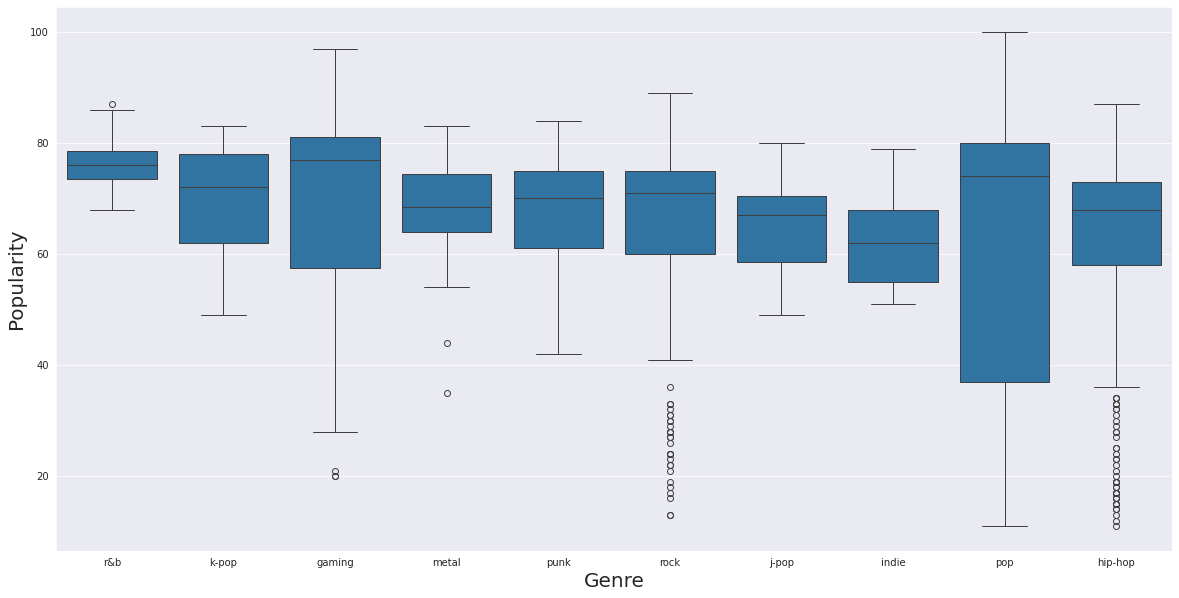

In [19]:
data = songs[songs["track_genre"].apply(lambda g : g in pop_genres)][["track_popularity", "track_genre"]]

print(type(data))
fig = plt.figure(figsize=(20, 10))

sns.boxplot(data=data, x='track_genre', y='track_popularity', order=pop_genres)

plt.xlabel('Genre', fontsize=20)
plt.ylabel('Popularity', fontsize=20)

plt.show()

Interesting! I however wonder, how much this plot can be trusted. Let's look at the amount of samples for each genre

In [20]:
print(data["track_genre"].value_counts())

track_genre
pop        441
hip-hop    350
rock       304
gaming     111
punk        71
r&b         47
metal       30
j-pop       23
k-pop       17
indie       17
Name: count, dtype: int64


Only between 17 and 71 samples for 6 of the genres... probably not the best for a comparison\
Guess: Drastic Outliers in rock and hip hop come from big playlists, that included weird stuff\
## Scatterplots on energy, acousticness
As those last two showed an actually significant correlation, I would like to visualise them
(hoping to see some nice trends)

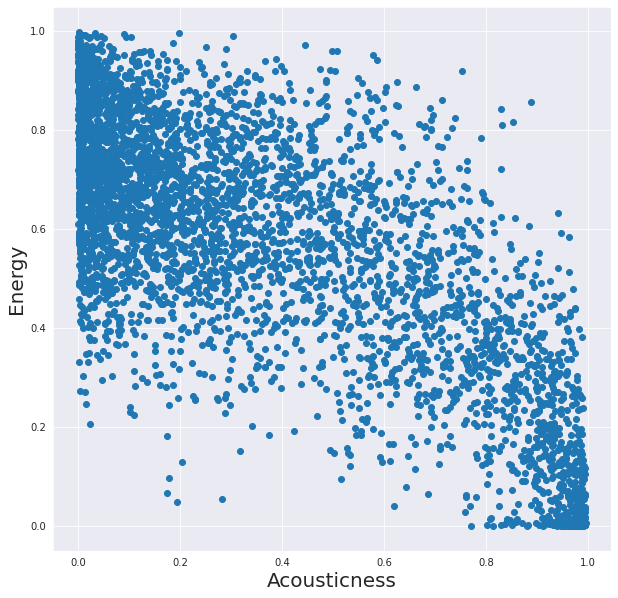

In [21]:
x = songs["acousticness"]
y = songs["energy"]

fig1 = plt.figure(figsize=(10, 10))
plt.scatter(x, y)
plt.xlabel('Acousticness', fontsize=20)
plt.ylabel('Energy', fontsize=20)
plt.show()